In [28]:
# 导入算法包以及数据集
from sklearn import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [83]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]
y_data = iris.target

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data)

In [30]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
def plot(model):
    # 获取数据值所在的范围
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
    
    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
    z = z.reshape(xx.shape)
    # 等高线图
    cs = plt.contourf(xx, yy, z)

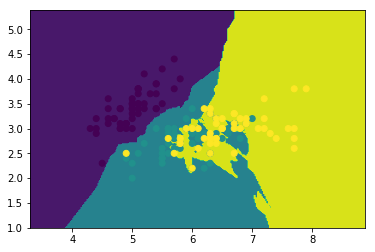

0.7631578947368421

In [32]:
# 画图
plot(knn)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
# 准确率
knn.score(x_test, y_test)

In [37]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

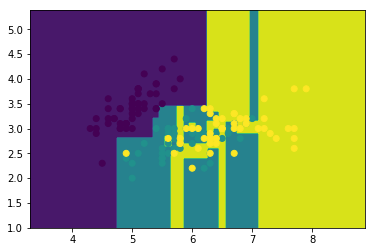

0.7894736842105263

In [87]:
# 画图
plot(dtree)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
# 准确率
knn.score(x_test, y_test)

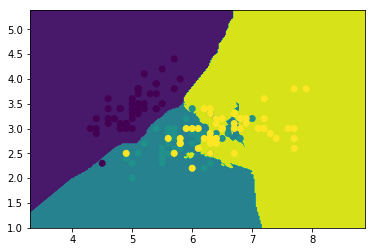

0.8157894736842105

In [75]:
bagging_knn = BaggingClassifier(knn, n_estimators=100)
# 输入数据建立模型
bagging_knn.fit(x_train, y_train)
plot(bagging_knn)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_knn.score(x_test, y_test)

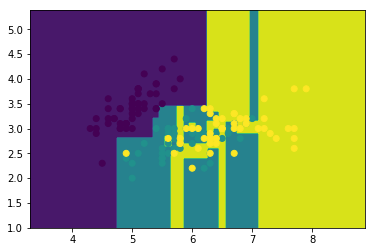

0.631578947368421

In [88]:
bagging_tree = BaggingClassifier(dtree, n_estimators=100)
# 输入数据建立模型
bagging_tree.fit(x_train, y_train)
plot(dtree)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_tree.score(x_test, y_test)

In [100]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

In [105]:
xx.shape

(220, 280)

In [106]:
xx.ravel().shape

(61600,)

In [107]:
220*280

61600

In [ ]:
np.c_[]